In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import glob
import cv2
import re
import pickle

import librosa
import librosa.display
from sklearn.preprocessing import LabelEncoder
#%matplotlib inline

%cd ../data/audio

C:\Users\lexokan\Dropbox\R and Python\generativeMusic\data\audio


In [2]:
songs = [re.search('.+?(?=\.wav)', x).group(0)
              for x in glob.iglob('*.wav')]

print(len(songs))

118


In [3]:
%cd ../img
# 4 make_image function 
def make_imageSTFT(data, outputname, ref):
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(data), ref=ref), y_axis= 'log')
    plt.savefig(outputname, dpi=200)
    
def make_imagePH(data, outputname, ref):
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(data), ref=ref), y_axis= 'log')
    plt.savefig(outputname, dpi=200)
    
def make_imageMEL(data, outputname):
    librosa.display.specshow(librosa.power_to_db(data, ref=np.max), y_axis= 'log')
    plt.savefig(outputname, dpi=200)

C:\Users\lexokan\Dropbox\R and Python\generativeMusic\data\img


C:\Users\lexokan\Dropbox\R and Python\generativeMusic\data\img\melspec


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lexokan\\Dropbox\\R and Python\\generativeMusic\\data\\img\\audio\\01_10003_1-04_Shri_Visvanatham.wav'

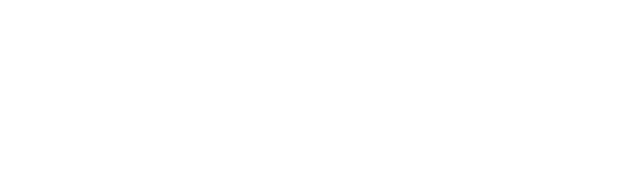

In [4]:
%cd melspec

fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

# Generate Melspecs
for i, song in enumerate(songs):
    y, sr = librosa.load('../audio/'+song + '.wav')
    
    D = librosa.stft(y)
    S = librosa.feature .melspectrogram(S=D)
    
    make_imageMEL(S, song + '_mel.png')

In [4]:
%cd melspec 
mels = [re.search('.+?(?=\.png)', x).group(0)
              for x in glob.iglob('*.png')]

print(len(mels))

C:\Users\lexokan\Dropbox\R and Python\generativeMusic\data\img\melspec
118


In [ ]:
%cd ../stft

fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

# Generate Melspecs
for i, song in enumerate(songs[109:]):
    print("Generating stft: ", i)
    y, sr = librosa.load('../../audio/'+song + '.wav')
    
    D = np.abs(librosa.stft(y))
    make_imageSTFT(D, song + '_stft.png', ref=np.max)

In [15]:
%cd ../stft
stfts = [re.search('.+?(?=\.png)', x).group(0)
              for x in glob.iglob('*.png')]

print(len(stfts))

C:\Users\lexokan\Dropbox\R and Python\generativeMusic\data\img\stft
118


In [ ]:
for i, song in enumerate(songs):
    print("Harmonic & Percussive: ": ", i)
    y, sr = librosa.load(song + '.wav')
    D = librosa.stft(y)              
    # Pre-compute a global reference power from the input spectrum
    rp = np.max(np.abs(D))
    
    D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
    make_imagePH(D_harmonic8, song + '_H8.png', rp)
    make_imagePH(D_percussive8, song + '_P8.png', rp)

In [28]:
# Check to see if the spectrograms and meters are in the same order 
# Extract song meter from the annotations directory 

meter = []
for song in songs:
    with open('../../annotations/meter/' + song + '.meter', 'r') as file:
        meter.append(file.readline())

# Encode song meter (taala) as an integer 
le = LabelEncoder()
meter_enc = le.fit_transform(meter)

print(meter[:5], meter_enc[:5])
print("\n", songs[:5])
print("\n", mels[:5])
print("\n", stfts[:5])

['8/4', '3/4', '7/8', '5/8', '8/4'] [3 0 2 1 3]

 ['01_10003_1-04_Shri_Visvanatham', '01_11001_3_Sankari_Neeve', '01_12001_8_Krishna_Nee_Begane', '01_13001_2-02_Hecharikaga', '02_10004_1_Vathapi']

 ['01_10003_1-04_Shri_Visvanatham_mel', '01_11001_3_Sankari_Neeve_mel', '01_12001_8_Krishna_Nee_Begane_mel', '01_13001_2-02_Hecharikaga_mel', '02_10004_1_Vathapi_mel']

 ['01_10003_1-04_Shri_Visvanatham_stft', '01_11001_3_Sankari_Neeve_stft', '01_12001_8_Krishna_Nee_Begane_stft', '01_13001_2-02_Hecharikaga_stft', '02_10004_1_Vathapi_stft']


In [31]:
df = []
for i, song in enumerate(songs):
    df.append((song, mels[i], stfts[i], meter_enc[i]))
    
with open('../../temp/specURLs.pkl', 'wb') as f:
    pickle.dump(df, f)